In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 4
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [3]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_4.csv' for score 'd4'.

df.head():
        data_date security_id      d4
3      2010-01-04     1178501     NaN
127269 2010-01-04     1178501     NaN
4      2010-01-04     1323901 -2.0536
127270 2010-01-04     1323901 -2.0536
5      2010-01-04     1384501     NaN

df.tail():
        data_date security_id      d4
254529 2017-12-27  1117183801  0.8111
127264 2017-12-28      647001  9.4120
254530 2017-12-28      647001  9.4120
127265 2017-12-29     2968101 -1.4925
254531 2017-12-29     2968101 -1.4925

getting df shape of (254532, 3)

WARNING! There are duplicated data_date and security_id pairs! There are total 127266 duplicated rows
  Will follow pre-defined logics to remove bad data and get the average value
            min_d4       max_d4       avg_d4  avg_min_pct  avg_max_pct
count  122593.0000  122593.0000  122593.0000     122575.0     122575.0
mean       -0.5378      -0.5378      -0.5378          1.0          1.0
std        86.4869      86.4869      

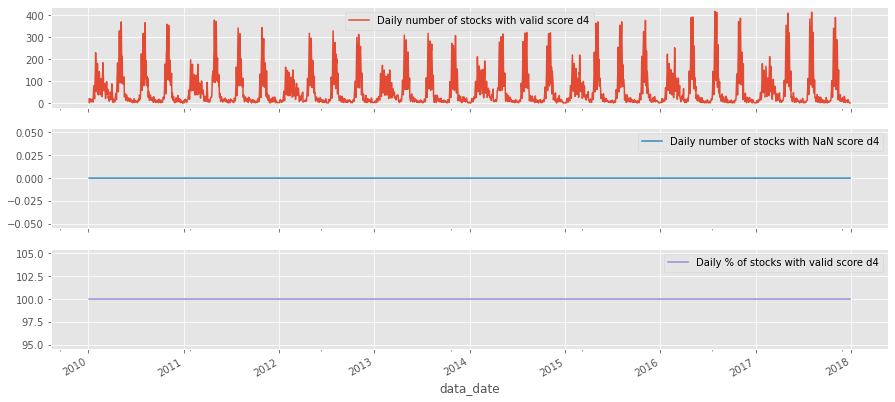

In [4]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [5]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date      0
security_id    0
d4             0
dtype: int64
data_date      0
security_id    0
d4             0
dtype: int64


In [6]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

 Dropping all NaNs
                  d4
count  122575.000000
mean       -0.537843
std        86.493227
min    -15928.100000
25%         0.053800
50%         4.114400
75%         9.731650
max       347.040000


<AxesSubplot:>

In [7]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [8]:
print("Merging the dataset with research universe")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
print("Counting NaNs for each column\n", data.isnull().sum())

Merging the dataset with research universe
Counting NaNs for each column
 data_date      0
security_id    0
d4             0
dtype: int64


In [10]:
print(f"df.head:\n{df.head()}\n")
print(f"df.tail:\n{df.tail()}\n")

df.head:
   data_date security_id       d4
1 2010-01-04     1323901  -2.0536
4 2010-01-04     1604101  -1.3229
5 2010-01-04     1610801  -3.7759
6 2010-01-04     2486001 -14.8978
7 2010-01-04     2664401  -1.8827

df.tail:
        data_date security_id       d4
127260 2017-12-26     2394801  15.2052
127261 2017-12-26     3538501 -52.7621
127263 2017-12-27  1117183801   0.8111
127264 2017-12-28      647001   9.4120
127265 2017-12-29     2968101  -1.4925



<AxesSubplot:title={'center':'Daily d4 #stocks falling into the trading universe'}, xlabel='data_date'>

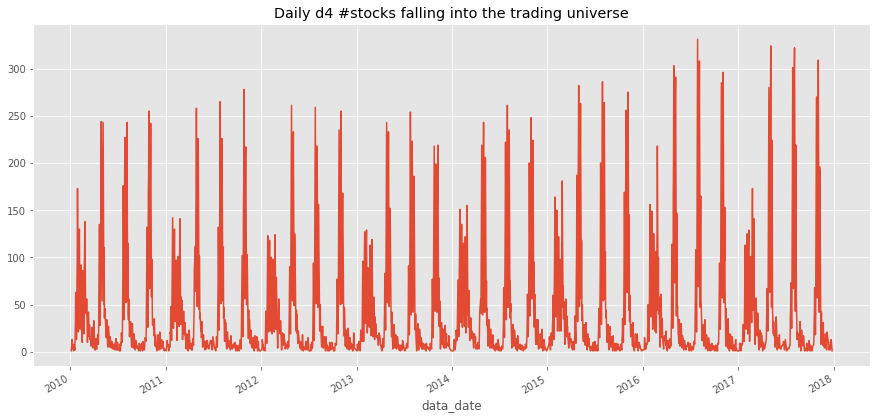

In [11]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [12]:
save_file_path = os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz')
print(f"data is saved to {save_file_path}")
data.to_csv(save_file_path, index=False, compression='gzip')

data is saved to /home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_data_4.csv.gz


Getting data from file 'data_set_4.csv' for score 'd4'
data_date      datetime64[ns]
security_id            object
d4                    float64
dtype: object
data_date         0
security_id       0
d4             9346
dtype: int64
(254532, 3)


array([<AxesSubplot:xlabel='data_date'>, <AxesSubplot:xlabel='data_date'>],
      dtype=object)

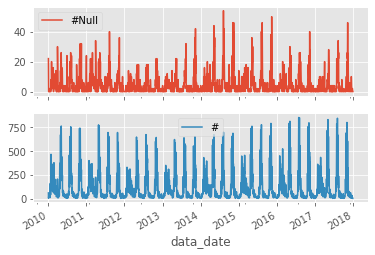

In [39]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline
plt.style.use("ggplot")

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

ds_id = 4
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'
dtcol = 'data_date'
seccol = 'security_id'

print(f"Getting data from file '{ds_filename}' for score '{scorecol}'")

with zipfile.ZipFile(os.path.join(data_root, 'data_sets.zip')) as zf:
    df = pd.read_csv(zf.open(ds_filename), 
                     parse_dates=['data_date'], dtype={'security_id': str})
    df[scorecol] = pd.to_numeric(df[scorecol], errors='coerce')
    
print(df.dtypes)
print(df.isnull().sum())
print(df.shape)

df.groupby('data_date').apply(lambda x: pd.Series([x[scorecol].isnull().sum(), x.shape[0]],
                                                 index=['#Null', '#'])).plot(subplots=True)

In [40]:
print(df.duplicated(subset=[dtcol, seccol]).sum())
print(df.shape)

127266
(254532, 3)


In [41]:
df.sort_values(by=[dtcol, seccol], inplace=True)
print(df.head())
print(df.tail())

        data_date security_id      d4
3      2010-01-04     1178501     NaN
127269 2010-01-04     1178501     NaN
4      2010-01-04     1323901 -2.0536
127270 2010-01-04     1323901 -2.0536
5      2010-01-04     1384501     NaN
        data_date security_id      d4
254529 2017-12-27  1117183801  0.8111
127264 2017-12-28      647001  9.4120
254530 2017-12-28      647001  9.4120
127265 2017-12-29     2968101 -1.4925
254531 2017-12-29     2968101 -1.4925


In [42]:
# if df.duplicated(subset=[dtcol, seccol]).any():
min_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].min()
max_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].max()
avg_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].mean()

avg_min_max = reduce(lambda x, y: pd.merge(x, y, on=[dtcol, seccol]),
                    [min_df.rename(columns={scorecol: f'min_{scorecol}'}),
                     max_df.rename(columns={scorecol: f'max_{scorecol}'}),
                     avg_df.rename(columns={scorecol: f'avg_{scorecol}'})])

In [43]:
avg_min_max.head()
avg_min_max['avg_min_pct'] = avg_min_max['avg_d4'] / avg_min_max['min_d4']
avg_min_max['avg_max_pct'] = avg_min_max['avg_d4'] / avg_min_max['max_d4']

print(avg_min_max.describe().round(4))

            min_d4       max_d4       avg_d4  avg_min_pct  avg_max_pct
count  122593.0000  122593.0000  122593.0000     122575.0     122575.0
mean       -0.5378      -0.5378      -0.5378          1.0          1.0
std        86.4869      86.4869      86.4869          0.0          0.0
min    -15928.1000  -15928.1000  -15928.1000          1.0          1.0
25%         0.0517       0.0517       0.0517          1.0          1.0
50%         4.1134       4.1134       4.1134          1.0          1.0
75%         9.7313       9.7313       9.7313          1.0          1.0
max       347.0400     347.0400     347.0400          1.0          1.0


In [44]:
avg_min_max = avg_min_max.loc[(avg_min_max['avg_min_pct'] <= 1.1) & (avg_min_max['avg_max_pct'] >= 0.9)]
df = avg_min_max[[dtcol, seccol, 'avg_d4']].rename(columns={'avg_d4': 'd4'})

print(df.head())

assert not df.duplicated(subset=[dtcol, seccol]).any()

   data_date security_id       d4
1 2010-01-04     1323901  -2.0536
4 2010-01-04     1604101  -1.3229
5 2010-01-04     1610801  -3.7759
6 2010-01-04     2486001 -14.8978
7 2010-01-04     2664401  -1.8827


In [45]:
rsch_universe = pd.read_csv(os.path.join(data_root, 'rsch_universe.csv.gz'), compression='gzip',
                            usecols=['data_date', 'security_id'],
                            parse_dates=['data_date'], dtype={'security_id': str})

assert not rsch_universe.duplicated(subset=[dtcol, seccol]).any()

data = pd.merge(df, rsch_universe, on=['data_date', 'security_id'], how='inner')
data.isnull().sum()

data_date      0
security_id    0
d4             0
dtype: int64

In [47]:
data.loc[data[scorecol] == 0].head()
print(data.shape)

(83657, 3)


Empty DataFrame
Columns: [security_id, d4]
Index: []


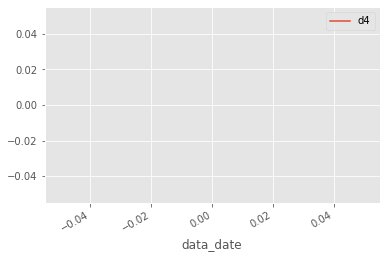

In [14]:
data.loc[data[seccol] == '23276101'].set_index(dtcol).plot()
print(data.loc[data[seccol] == '23276101'].set_index(dtcol).tail())

In [48]:
data[scorecol] = data[scorecol].replace([0, np.inf, -np.inf], np.nan)
data.dropna(subset=[scorecol], inplace=True)

In [49]:
def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()
    
plot_timeseries_dist(data, scorecol, dtcol, plot_min_max=False)

In [50]:
data.to_csv(os.path.join(data_root, f'data_{ds_id}.csv.gz'), index=False, compression='gzip')